In [1]:
from __future__ import print_function, division
%matplotlib inline

# Your code goes here
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import accuracy_score, log_loss
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score, recall_score, precision_score, f1_score, confusion_matrix

/usr/lib64/python3.4/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
dataset_original = pd.read_csv('span_feb_24.csv',delimiter = ',')
dataset_original = dataset_original.loc[dataset_original['proj_span'] >= 10.0]

dataset1 = pd.read_csv('span_fir_quater_feb_24.csv',delimiter = ',')
data_neg = dataset1.loc[(dataset1['class']==0) & (dataset1['id'].isin(dataset_original['id']))]
data_pos = dataset1.loc[(dataset1['class']==1) & (dataset1['id'].isin(dataset_original['id']))]
print(data_neg.shape)
print(data_pos.shape)

(21820, 96)
(5993, 96)


In [3]:
dataset = pd.read_csv('span_fir_quater_feb_24.csv',delimiter = ',')
dataset = dataset.loc[dataset['id'].isin(dataset_original['id'])]


In [4]:
X = (dataset.drop('class', axis=1)).drop('id', axis=1)
y = dataset['class']
dataset.shape

(27813, 96)

In [5]:

dataset.describe()

,activity_intensity,class,contribution_30_10,contribution_50_30,contribution_below_10,contribution_over_50,final_teamsize,first_quater_teamsize,majority_contribution_time,max_contribution_percentage,...,num_TeamAdd_Q4,num_Watch,num_Watch_Q1,num_Watch_Q2,num_Watch_Q3,num_Watch_Q4,num_joint_project,num_joint_success_project,proj_span,team_age_in_days
count,27813.000000,27813.000000,27813.000000,27813.000000,27813.000000,27813.000000,27813.000000,27813.000000,27813.000000,27813.000000,...,27813.000000,27813.000000,27813.000000,27813.000000,27813.000000,27813.000000,27813.000000,27813.000000,27813.000000,27813.000000
mean,1.916007,0.215475,0.337540,0.261065,3.107827,0.858987,4.565419,4.565419,0.545680,0.848609,...,0.000935,0.203826,0.054902,0.068961,0.072376,0.059145,828.326358,814.016647,23.956172,53.731277
std,3.454765,0.411159,0.831806,0.615824,237.373068,0.348041,237.364690,237.364690,0.497918,0.218953,...,0.030561,2.555817,0.797873,0.660730,0.771995,0.665123,2738.267131,2731.359397,65.819460,141.433467
min,0.001358,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000747,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,0.400000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.714286,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,14.000000,35.000000
max,256.666667,1.000000,9.000000,3.000000,39495.000000,1.000000,39495.000000,39495.000000,1.000000,1.000000,...,1.000000,198.000000,78.000000,46.000000,46.000000,54.000000,10064.000000,10033.000000,1473.000000,1718.000000


In [6]:
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.2, random_state=20190101)
X_tr, X_val, y_tr, y_val = train_test_split(X_tr, y_tr, test_size=0.25, random_state=20190101)
print('training size: ', X_tr.shape[0])
print('validation size: ', X_val.shape[0])
print('test size: ', X_test.shape[0])

training size:  16687
validation size:  5563
test size:  5563


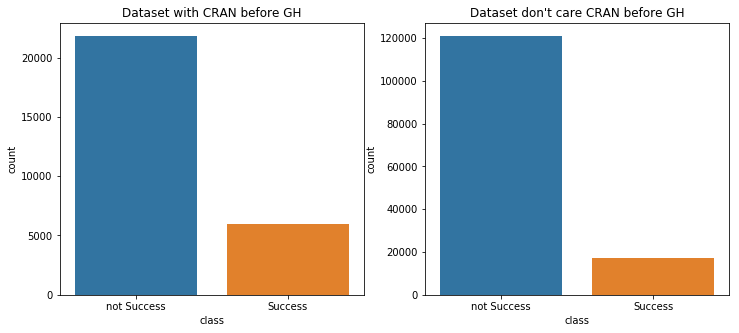

In [7]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
ax1 = sns.countplot(x='class', data=dataset)
ax1.set_xticklabels(['not Success', 'Success'])
plt.title('Dataset with CRAN before GH')
ax2 = plt.subplot(1,2,2)
sns.countplot(x='class', data=dataset1)
ax2.set_xticklabels(['not Success', 'Success'])
plt.title('Dataset don\'t care CRAN before GH')
plt.show()

In [8]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_tr, y_tr)
ca = lr.score(X_tr, y_tr)
print('Classification accuracy of the LogisticRegression classifier on training set: {:.5f}'.format(ca))
y_pred = lr.predict(X_tr)
p = precision_score(y_pred=y_pred,y_true=y_tr, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))
ca = lr.score(X_val, y_val)
y_pred = lr.predict(X_val)
p = precision_score(y_pred=y_pred,y_true=y_val, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_val, pos_label=1)
print('\nClassification accuracy of the LogisticRegression classifier on val set: {:.5f}'.format(ca))
print('Precision on val: {:.5f}'.format(p))
print('Recall on val: {:.5f}'.format(r))
confusion_matrix(y_pred=y_pred, y_true=y_test)

Classification accuracy of the LogisticRegression classifier on training set: 0.86654
Precision on train: 0.96218
Recall on train: 0.38737

Classification accuracy of the LogisticRegression classifier on val set: 0.86698
Precision on val: 0.95082
Recall on val: 0.39322


array([[3914,  383],
       [1161,  105]])

In [9]:
# display coef for logistic regression model
print(lr.coef_)
print(lr.intercept_)

[[-1.13552082e-01  1.13903732e-02 -4.01569928e-02  2.40997712e-01
  -3.36381909e-01 -1.24150816e-01 -1.24150816e-01 -1.47855620e-01
  -3.43578978e-01  1.15129407e-04  2.98264820e-03  3.64747706e-03
   1.90240163e-03 -2.06934292e-03 -3.04856822e-03  3.62798586e-02
  -5.59775658e-02 -3.56187884e-02  2.45220211e-02  1.60741566e-02
   4.14745374e-02  7.57539111e-03  1.64627634e-02  1.72769804e-02
   1.46964259e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -6.61783266e-02 -2.97736656e-02
  -2.96560556e-02 -2.66238803e-02 -1.93740791e-02 -3.92053463e-02
  -1.03665950e-03 -2.10044279e-02 -6.66739046e-03 -1.96367422e-02
  -3.52578380e-02 -1.40045154e-02 -2.81100801e-02 -1.44705248e-02
   1.63710232e-02  1.78504526e-04 -8.52344904e-03 -1.44430158e-02
  -5.30990580e-03  1.76057250e-02 -2.39592497e-03  2.47549414e-03
  -8.24855891e-03 -6.08741291e-03 -2.58786374e-03 -9.11758234e-03
  -8.14839121e-03 -5.77141298e-03 -4.33036556e-03 -4.19668038e-03
   2.37682

In [10]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [11]:
# cm = confusion_matrix(y_pred=y_pred, y_true=y_test)
# # retrive the normalized version of cm
# cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

# plt.figure()
# plot_confusion_matrix(cm_norm, classes=['unsuccess','success'])
# plt.show()

In [12]:
# lr = LogisticRegression(solver='lbfgs')
# lr.fit(X_tr, y_tr)
# predictions = lr.predict(X_tr)
# params = np.append(lr.intercept_, lr.coef_)
# newX = pd.DataFrame({"Constant":np.ones(len(X_tr))}).join(pd.DataFrame(X_tr.reset_index(drop=True)))
# MSE = (sum((y_tr-predictions)**2))/(len(newX)-len(newX.columns))


# var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
# sd_b = np.sqrt(var_b)
# ts_b = params/ sd_b
# print(newX)
# p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]

# sd_b = np.round(sd_b,3)
# ts_b = np.round(ts_b,3)
# p_values = np.round(p_values,3)
# params = np.round(params,4)

# myDF3 = pd.DataFrame()
# myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilites"] = [params,sd_b,ts_b,p_values]
# print(myDF3)

In [13]:
# cm = confusion_matrix(y_pred=y_pred, y_true=y_test_1)
# # retrive the normalized version of cm
# cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

# plt.figure()
# plot_confusion_matrix(cm_norm, classes=['unsuccess','success'])
# plt.show()

In [14]:
# transform the data
ss = StandardScaler()
ss.fit(X_tr)
X_tr = ss.transform(X_tr)
X_val = ss.transform(X_val)



In [15]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_tr, y_tr)
ca = lr.score(X_tr, y_tr)
print('Classification accuracy of the LogisticRegression classifier on training set: {:.5f}'.format(ca))
y_pred = lr.predict(X_tr)
p = precision_score(y_pred=y_pred,y_true=y_tr, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))

ca = lr.score(X_val, y_val)
y_pred = lr.predict(X_val)
p = precision_score(y_pred=y_pred,y_true=y_val, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_val, pos_label=1)
print('\nClassification accuracy of the LogisticRegression classifier on val set: {:.5f}'.format(ca))
print('Precision on val: {:.5f}'.format(p))
print('Recall on val: {:.5f}'.format(r))

Classification accuracy of the LogisticRegression classifier on training set: 0.86738
Precision on train: 0.92484
Recall on train: 0.40936

Classification accuracy of the LogisticRegression classifier on val set: 0.86698
Precision on val: 0.90892
Recall on val: 0.41441


In [16]:
# display coef for logistic regression model
print(lr.coef_)
print(lr.intercept_)

[[-0.07804281  0.01624625  0.0476366  -0.32152508  0.15397546 -0.32122188
  -0.32122188  0.08026875 -0.35737078  0.39725254  0.02732427  0.01451928
   0.01081202 -0.07724027 -0.00967198  0.2068572  -0.1009247   0.01828702
   0.1217319   0.0851079  -0.99763769  0.29499606  0.40362173  0.32964198
   0.29906465  0.          0.          0.          0.          0.
  -0.77583769 -0.90383636 -0.98539065 -0.94864671 -0.78942148  0.54392582
  -0.06757526 -0.20735805 -0.0384345  -0.36863901 -0.75300566  0.10106284
   0.25715888  0.09466896  0.35615553 -0.39946587  0.1513098   0.19408812
   0.01196046  0.24716457  0.03733403  0.00615956 -0.05854931 -0.02697436
  -0.0108457   0.28697786 -0.30691366  0.04578105 -0.0903777  -0.13997508
  -1.14978175 -1.1892526   0.33012709  0.38926754  0.23175321  0.40036788
   0.36741606  0.45433813  0.17118616  0.33111041  0.42496547 -0.03022133
   0.20422469 -0.38325939 -0.16054445  0.04001925  0.03091578 -0.01390929
   0.01289451 -0.05250019 -0.00911924 -0.01525

In [17]:
# cm = confusion_matrix(y_pred=y_pred, y_true=y_test)
# # retrive the normalized version of cm
# cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

# plt.figure()
# plot_confusion_matrix(cm_norm, classes=['unsuccess','success'])
# plt.show()

In [18]:
# cm = confusion_matrix(y_pred=y_pred, y_true=y_test_1)
# # retrive the normalized version of cm
# cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

# plt.figure()
# plot_confusion_matrix(cm_norm, classes=['unsuccess','success'])
# plt.show()

In [19]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_tr, y_tr)
y_pred = rf.predict(X_tr)
p = precision_score(y_pred=y_pred,y_true=y_tr, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
accuracy_score_train = rf.score(X_tr, y_tr)
print('Accuracy score on the training dataset: {}'.format(accuracy_score_train))
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))

# test set
y_pred = rf.predict(X_val)
p = precision_score(y_pred=y_pred,y_true=y_val, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_val, pos_label=1)
accuracy_score_val = rf.score(X_val, y_val)
print('\nAccuracy score on the val dataset: {:.5f}'.format(accuracy_score_val))
print('Precision on val: {:.5f}'.format(p))
print('Recall on val: {:.5f}'.format(r))

Accuracy score on the training dataset: 0.9977227782105831
Precision on train: 0.99745
Recall on train: 0.99182

Accuracy score on the val dataset: 0.96656
Precision on val: 0.93982
Recall on val: 0.90000


In [20]:
# cm = confusion_matrix(y_pred=y_pred, y_true=y_test)
# # retrive the normalized version of cm
# cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

# plt.figure()
# plot_confusion_matrix(cm_norm, classes=['unsuccess','success'])
# plt.show()

In [21]:
features = X.columns[:].values.tolist()
important_features = rf.feature_importances_
feature_index = np.argsort(important_features)[::-1]
print('Names of the 10 most important features:')
for n in range(10):
    print("{}. {}".format(n+1, features[feature_index[n]]))

Names of the 10 most important features:
1. num_joint_success_project
2. num_joint_project
3. team_age_in_days
4. normalized_proj_span
5. activity_intensity
6. proj_span
7. max_contribution_percentage
8. num_Push
9. num_Push_Q2
10. num_Push_Q3


In [22]:
# cm = confusion_matrix(y_pred=y_pred, y_true=y_test_1)
# # retrive the normalized version of cm
# cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

# plt.figure()
# plot_confusion_matrix(cm_norm, classes=['unsuccess','success'])
# plt.show()

In [23]:
# svc_linear = SVC(kernel='linear')
# svc_linear.fit(X_tr, y_tr)
# ca = svc_linear.score(X_tr, y_tr)
# print('Linear SVC classification accuracy on training set: {:.5f}'.format(ca))
# ca = svc_linear.score(X_test, y_test)
# print('Linear SVC classification accuracy on test set: {:.5f}'.format(ca))

In [24]:


svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X_tr, y_tr)
ca = svc_rbf.score(X_tr, y_tr)
print('\nRadial Basis Function SVC classification accuracy on training set: {:.5f}'.format(ca))
ca = svc_rbf.score(X_val, y_val)
print('Radial Basis Function SVC classification accuracy on val set: {:.5f}'.format(ca))

# svc_poly = SVC(kernel='poly')
# svc_poly.fit(X_tr, y_tr)
# ca = svc_poly.score(X_tr, y_tr)
# print('\nPolynomial SVC classification accuracy on training set: {:.5f}'.format(ca))
# ca = svc_poly.score(X_test, y_test)
# print('Polynomial SVC classification accuracy on test set: {:.5f}'.format(ca))


Radial Basis Function SVC classification accuracy on training set: 0.87889
Radial Basis Function SVC classification accuracy on val set: 0.87021


In [25]:
y_pred = svc_rbf.predict(X_tr)
p = precision_score(y_pred=y_pred,y_true=y_tr, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))

y_pred = svc_rbf.predict(X_val)
p = precision_score(y_pred=y_pred,y_true=y_val, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_val, pos_label=1)
print('Precision on val: {:.5f}'.format(p))
print('Recall on val: {:.5f}'.format(r))


Precision on train: 0.98848
Recall on train: 0.43530
Precision on val: 0.97119
Recall on val: 0.40000
